In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A_images = []
path = ("C:/Users/tandrima/Technocolabs/Final project/datasets/A/")
# print(os.listdir(path))
for image in os.listdir(path):
    img = cv2.imread(f"C:/Users/tandrima/Technocolabs/Final project/datasets/A/{image}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100,100))
    A_images.append(img)   

In [4]:
B_images = []
path= ("C:/Users/tandrima/Technocolabs/Final project/datasets/B/")
for image in os.listdir(path):
    img = cv2.imread(f"C:/Users/tandrima/Technocolabs/Final project/datasets/B/{image}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100,100))
    B_images.append(img) 


In [5]:
C_images = []
path= ("C:/Users/tandrima/Technocolabs/Final project/datasets/C/")
for image in os.listdir(path):
    img = cv2.imread(f"C:/Users/tandrima/Technocolabs/Final project/datasets/C/{image}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100,100))
    C_images.append(img) 


In [6]:
A_images = np.asarray(A_images)

In [7]:
B_images = np.asarray(B_images)

In [8]:
C_images = np.asarray(C_images)

In [9]:
A_images.shape , B_images.shape , C_images.shape

((1000, 100, 100), (1000, 100, 100), (1000, 100, 100))

In [10]:
A_images = A_images.reshape((1000,100,100,1))
B_images = B_images.reshape((1000,100,100,1))
C_images = C_images.reshape((1000,100,100,1))
A_images.shape, B_images.shape, C_images.shape

((1000, 100, 100, 1), (1000, 100, 100, 1), (1000, 100, 100, 1))

In [11]:
A_images.shape, B_images.shape, C_images.shape

((1000, 100, 100, 1), (1000, 100, 100, 1), (1000, 100, 100, 1))

In [12]:
a_labels = np.asarray([0]*len(A_images))
b_labels = np.asarray([1]*len(B_images))
c_labels = np.asarray([2]*len(C_images))
a_labels.shape, c_labels.shape, c_labels.shape

((1000,), (1000,), (1000,))

In [13]:
labels = np.hstack((a_labels, b_labels, c_labels))

In [14]:
labels.shape

(3000,)

In [15]:
images = np.vstack((A_images, B_images, C_images))

In [16]:
images.shape

(3000, 100, 100, 1)

In [17]:
print(labels[:25])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [18]:
from sklearn.utils import shuffle
images, labels = shuffle(images, labels)

In [19]:
print(labels[:25])

[0 2 0 2 1 0 2 1 1 0 0 1 2 2 0 0 1 0 0 0 0 1 0 1 1]


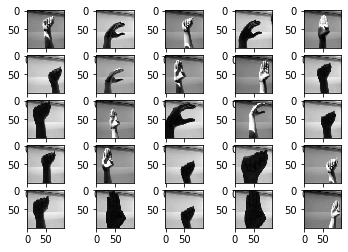

In [20]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(images[i].reshape((100,100)), cmap = "gray")
plt.show()

In [21]:
from keras.utils import to_categorical
labels = to_categorical(labels, 3)

In [22]:
labels.shape

(3000, 3)

In [23]:
images = images / 255.0

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2400, 100, 100, 1), (2400, 3), (600, 100, 100, 1), (600, 3))

In [25]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [26]:
model = Sequential()

model.add(Conv2D(128, (3,3), activation='relu', input_shape = X_train.shape[1:]))
model.add(MaxPool2D())
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
38/38 [==============================] - 205s 5s/step - loss: 0.6241 - accuracy: 0.7129 - val_loss: 0.0889 - val_accuracy: 0.9783
Epoch 2/5
38/38 [==============================] - 172s 5s/step - loss: 0.0198 - accuracy: 0.9950 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/5
38/38 [==============================] - 175s 5s/step - loss: 8.6743e-04 - accuracy: 1.0000 - val_loss: 2.0181e-04 - val_accuracy: 1.0000
Epoch 4/5
38/38 [==============================] - 177s 5s/step - loss: 1.2495e-04 - accuracy: 1.0000 - val_loss: 9.8621e-05 - val_accuracy: 1.0000
Epoch 5/5
38/38 [==============================] - 172s 5s/step - loss: 6.7996e-05 - accuracy: 1.0000 - val_loss: 6.0542e-05 - val_accuracy: 1.0000


In [29]:
score = model.evaluate(x=images, y=labels,verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 1.0


In [30]:
print(np.argmax(y_test[100]))
print(np.argmax(model.predict(X_test[100].reshape((1,100,100,1)))))

0
0


In [31]:
model.save('newasl.h5')